In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils


# New Section

In [3]:
clusters = 5 # clusters is the number of dominant colors we want

img = cv2.imread('/content/pexels-picjumbocom-196652.jpg',cv2.IMREAD_UNCHANGED)
org_img = img.copy()
print('Org image shape --> ',img.shape)

Org image shape -->  (2667, 4000, 3)


# New Section

In [4]:
img = imutils.resize(img,height=200) # resizing the image using imutils

In [5]:
print('After resizing shape --> ',img.shape)


After resizing shape -->  (200, 299, 3)


In [6]:
flat_img = np.reshape(img,(-1,3))      # merges all layers of image into one
#print('After Flattening shape --> ',flat_img.shape)


In [7]:
kmeans = KMeans(n_clusters=clusters,random_state=0)  # using kmeans for clustering data
kmeans.fit(flat_img)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [8]:
dominant_colors = np.array(kmeans.cluster_centers_,dtype='uint')

In [9]:
print(dominant_colors) # printing image into array for further modifications

[[133 103 101]
 [248 238 234]
 [ 80  75  76]
 [224 194 184]
 [190 144 131]]


In [10]:
percentages = (np.unique(kmeans.labels_,return_counts=True)[1])/flat_img.shape[0]
p_and_c = zip(percentages,dominant_colors)
p_and_c = sorted(p_and_c,reverse=True)   # ziping percentages and colors

In [11]:
hex_lst=[]

In [12]:
hex_lst.clear()
print(hex_lst)

[]


In [13]:
def rgb_to_hex(r, g, b):    # for extracting hex code of colors
  return ('{:X}{:X}{:X}').format(r, g, b)
for i in range(0,len(p_and_c)):
  hex_lst.append('#'+rgb_to_hex(p_and_c[i][1][2],p_and_c[i][1][1],p_and_c[i][1][0]))
print(hex_lst)

['#4C4B50', '#EAEEF8', '#656785', '#8390BE', '#B8C2E0']


In [14]:
print(len(p_and_c))

5


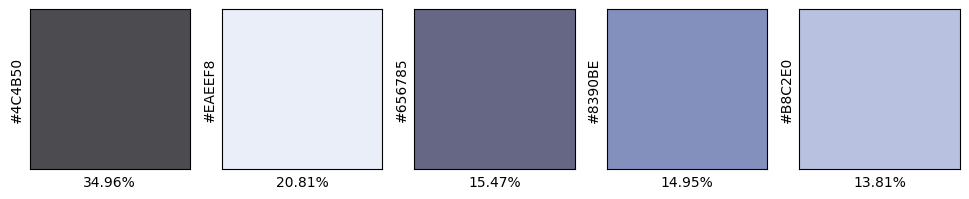

In [15]:
block = np.ones((50,50,3),dtype='uint')
plt.figure(figsize=(12,8))
for i in range(clusters):
    plt.subplot(1,clusters,i+1)
    block[:] = p_and_c[i][1][::-1] # we have done this to convert bgr(opencv) to rgb(matplotlib)
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')
    plt.ylabel(str(hex_lst[i]))


([], [])

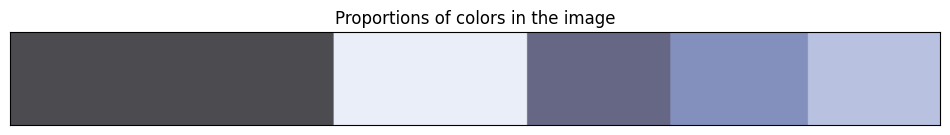

In [16]:
bar = np.ones((50,500,3),dtype='uint')
plt.figure(figsize=(12,8))
plt.title('Proportions of colors in the image')  # printing a bar graph in accordance with percentages of colors in image
start = 0
i = 1
for p,c in p_and_c:
    end = start+int(p*bar.shape[1])
    if i==clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1

plt.imshow(bar)
plt.xticks([])
plt.yticks([])


In [17]:
rows = 1000
cols = int((org_img.shape[0]/org_img.shape[1])*rows)
img = cv2.resize(org_img,dsize=(rows,cols),interpolation=cv2.INTER_LINEAR)


array([[[ 72,  70,  70],
        [ 72,  70,  70],
        [ 72,  70,  70],
        ...,
        [ 77,  75,  73],
        [ 84,  85,  74],
        [ 98,  98,  80]],

       [[ 72,  70,  70],
        [ 72,  70,  70],
        [ 72,  70,  70],
        ...,
        [ 81,  79,  74],
        [ 96,  92,  77],
        [117, 113,  88]],

       [[ 72,  70,  70],
        [ 72,  70,  70],
        [ 72,  70,  70],
        ...,
        [ 87,  87,  78],
        [105, 103,  83],
        [120, 115,  85]],

       ...,

       [[ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [ 72,  70,  70],
        [ 72,  70,  70],
        [ 72,  70,  70]],

       [[ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [ 72,  70,  70],
        [ 72,  70,  70],
        [ 72,  70,  70]],

       [[ 70,  70,  70],
        [ 70,  70,  70],
        [ 70,  70,  70],
        ...,
        [ 71,  69,  69],
        [ 72,  70,  70],
        [ 72,  70,  70]]], dtype=uint8)
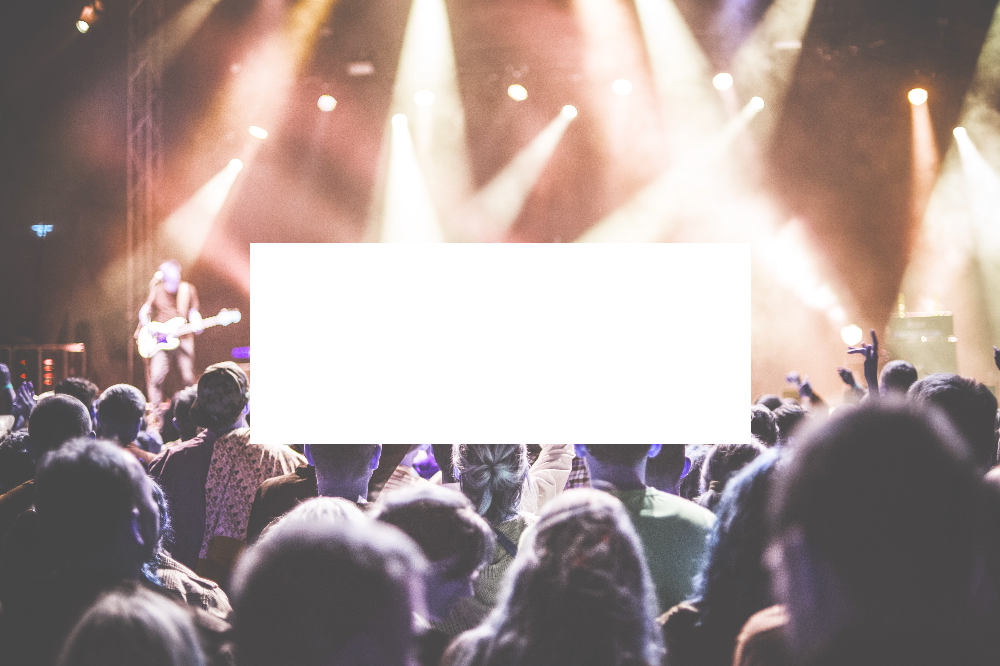

In [18]:
copy = img.copy()
cv2.rectangle(copy,(rows//2-250,cols//2-90),(rows//2+250,cols//2+110),(255,255,255),-1)


array([[[ 72,  70,  70],
        [ 72,  70,  70],
        [ 72,  70,  70],
        ...,
        [ 77,  75,  73],
        [ 84,  85,  74],
        [ 98,  98,  80]],

       [[ 72,  70,  70],
        [ 72,  70,  70],
        [ 72,  70,  70],
        ...,
        [ 81,  79,  74],
        [ 96,  92,  77],
        [117, 113,  88]],

       [[ 72,  70,  70],
        [ 72,  70,  70],
        [ 72,  70,  70],
        ...,
        [ 87,  87,  78],
        [105, 103,  83],
        [120, 115,  85]],

       ...,

       [[ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [ 72,  70,  70],
        [ 72,  70,  70],
        [ 72,  70,  70]],

       [[ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [ 72,  70,  70],
        [ 72,  70,  70],
        [ 72,  70,  70]],

       [[ 70,  70,  70],
        [ 70,  70,  70],
        [ 70,  70,  70],
        ...,
        [ 71,  69,  69],
        [ 72,  70,  70],
        [ 72,  70,  70]]], dtype=uint8)
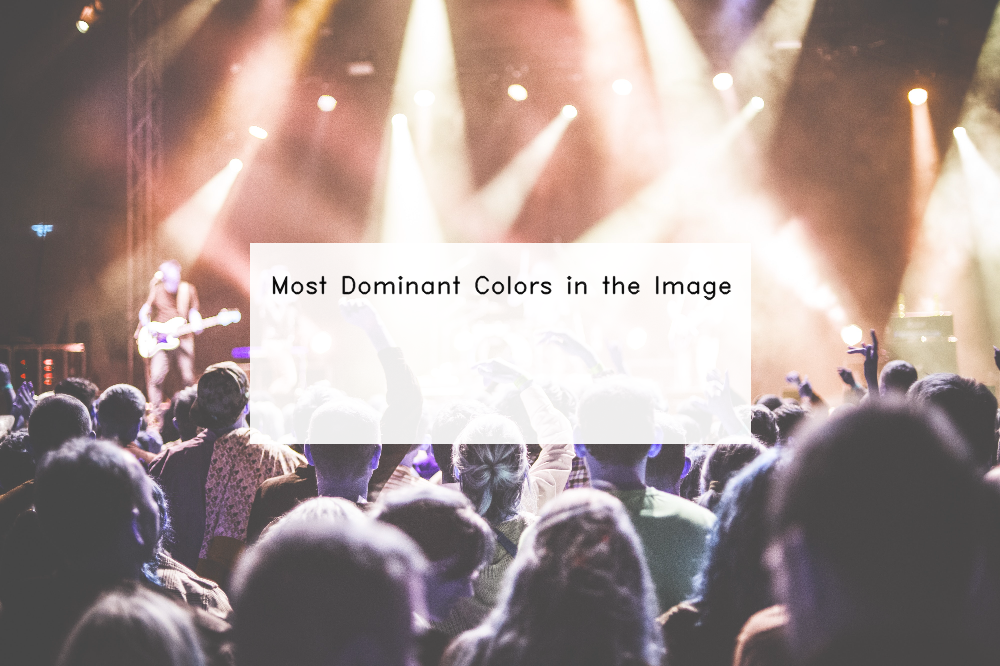

In [19]:
final = cv2.addWeighted(img,0.1,copy,0.9,0)
cv2.putText(final,'Most Dominant Colors in the Image',(rows//2-230,cols//2-40),cv2.FONT_HERSHEY_DUPLEX,0.8,(0,0,0),1,cv2.LINE_AA)



In [21]:
start = rows//2-220
for i in range(5):
    end = start+70
    final[cols//2:cols//2+70,start:end] = p_and_c[i][1]
    cv2.putText(final,str(i+1),(start+25,cols//2+45),cv2.FONT_HERSHEY_DUPLEX,1,(255,255,255),1,cv2.LINE_AA)
    start = end+20

plt.show()


In [22]:
cv2.imwrite('output.png',final)

True

In [ ]:
from google.colab import files
files.download("output.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>